In [1]:
## what is the probability of deley happens at certain station/time, to predict how many minutes will be deley? 

In [1]:
import pandas as pd

# Read the CSV

In [2]:
# the dataset used contains all delays under 30 mins. 
df = pd.read_csv("../Data/ttc_subway_delay_2018_2019.csv", encoding='unicode_escape')
# Drop the null columns where all values are null
df.shape


(13732, 20)

In [3]:
df.nunique()

id              13732
date              730
time             1279
day                 7
station            81
code              181
min_delay         116
min_gap           125
bound               4
line                4
vehicle           636
code_info         133
latitude           74
longitude          76
line_name           4
month              12
time_range          6
month_number       12
hour               24
year                2
dtype: int64

In [4]:
# Drop the null columns where all values are null
df= df.dropna(axis='columns', how='all')
df.head(2)


,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,1,2019-01-01,3:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,6061,ATC Project,43.674584,-79.40683,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
1,2,2019-01-01,3:08,Tuesday,EGLINTON WEST STATION,EUATC,11,16,S,YU,5656,ATC RC&S Equipment,43.699209,-79.435819,Yonge University Spadina,January,9PM-1:30AM,1,3,2019


In [5]:
# Drop the null columns where all values are null
df= df.dropna(axis='rows', how='all')
df.describe()

,id,min_delay,min_gap,vehicle,latitude,month_number,hour,year
count,13732.000000,13732.000000,13732.000000,13732.000000,13253.000000,13732.000000,13732.000000,13732.000000
mean,6866.500000,6.641931,9.850495,5189.117536,43.703612,6.382391,12.829231,2018.486164
std,3964.231283,12.015825,12.137669,1198.676152,0.045908,3.438495,5.963210,0.499827
min,1.000000,2.000000,0.000000,0.000000,43.637222,1.000000,0.000000,2018.000000
25%,3433.750000,3.000000,6.000000,5144.000000,43.667222,3.000000,8.000000,2018.000000
50%,6866.500000,4.000000,8.000000,5416.000000,43.687778,6.000000,13.000000,2018.000000
75%,10299.250000,6.000000,10.000000,5796.000000,43.734167,9.000000,18.000000,2019.000000
max,13732.000000,515.000000,519.000000,8065.000000,43.794167,12.000000,23.000000,2019.000000


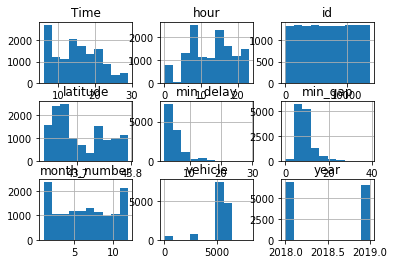

In [26]:
histogram = df.hist()

In [6]:
max(df['min_gap'])

519

In [7]:
df = df.loc[(df['min_delay']<30)]
df.count()

id              13500
date            13500
time            13500
day             13500
station         13500
code            13500
min_delay       13500
min_gap         13500
bound           13362
line            13499
vehicle         13500
code_info       13436
latitude        13027
longitude       13027
line_name       13499
month           13500
time_range      13500
month_number    13500
hour            13500
year            13500
dtype: int64

In [8]:
df['Time'] = df['hour'].apply(lambda x: x if x > 5 else x+24)

In [9]:
min(df['Time'])

6

In [10]:
max(df['Time'])

29

In [11]:
bins = [6,9,16,20,25,29]
labels= ['morning_rush_hour','mid_day','afternoon_rush_hour','evening','off_operation']
df['Time_group']=pd.cut(df['Time'], bins, labels=labels)

In [12]:
##df.to_csv("../Data/ttc_subway_delay_2018_2019_ml.csv")

# Data Cleaning

In [13]:
df_YU = df[df['line']=='YU']
df_YU.shape

(6968, 22)

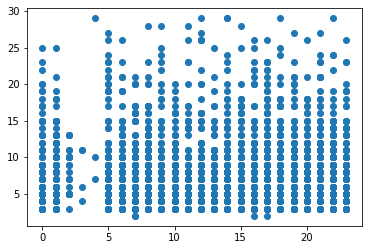

In [14]:
 %matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df_YU['hour'], df_YU['min_delay'])

In [13]:
##df_YU.to_csv("../Data/df_YU.csv")

In [15]:
data_YU = df_YU[['min_delay','Time_group','station','day','code']]
data_YU.nunique()

min_delay      28
Time_group      5
station        42
day             7
code          111
dtype: int64

In [16]:
data_YU.dtypes

min_delay        int64
Time_group    category
station         object
day             object
code            object
dtype: object

#  Data Pre-Processing

In [17]:
y = data_YU["min_delay"].values.reshape(-1, 1)
y

array([[11],
       [11],
       [ 6],
       ...,
       [ 3],
       [ 5],
       [ 3]], dtype=int64)

In [18]:
X = data_YU[['Time_group','day','station','code']]
X.tail()

,Time_group,day,station,code
13723,mid_day,Monday,FINCH STATION,MUIE
13725,mid_day,Monday,SPADINA YUS STATION,PUSTC
13726,afternoon_rush_hour,Monday,EGLINTON WEST STATION,EUATC
13730,evening,Monday,SPADINA YUS STATION,PUSTC
13731,evening,Monday,DUNDAS STATION,SUDP


In [57]:
print(X.shape, y.shape)

(6968, 4) (6968, 1)


# get_dummies

In [29]:
X_encoded= pd.get_dummies(X)
X_encoded.head()

,Time_group_morning_rush_hour,Time_group_mid_day,Time_group_afternoon_rush_hour,Time_group_evening,Time_group_off_operation,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,code_TUML,code_TUMVS,code_TUNIP,code_TUNOA,code_TUO,code_TUOS,code_TUS,code_TUSC,code_TUST,code_TUSUP
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.6)
print(X_train.shape, y_train.shape)

(2787, 165) (2787, 1)


In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 6.453690308304151e+22, R2: -4.605716933921689e+21


 A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

In [40]:
 # Overall Score for the model
print(f"train score:{model.score(X_train, y_train)}, test score:{model.score(X_test,y_test)}")

train score:0.3484272044177176, test score:-4.605716933921689e+21


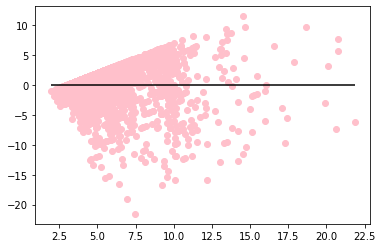

In [41]:
 predictions = model.predict(X_train)
# Plot Residuals
plt.scatter(predictions, predictions - y_train, c="pink", label="Training Data")

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

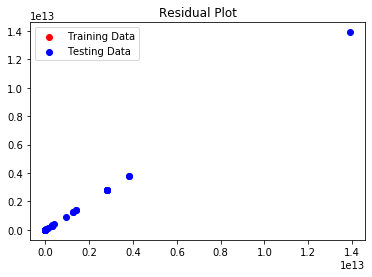

In [42]:
pre_train = model.predict(X_train)
pre_test=model.predict(X_test)
plt.scatter(pre_train, pre_train - y_train, c="red", label="Training Data")
plt.scatter(pre_test, pre_test - y_test, c="blue", label="Testing Data")
plt.legend()

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

# Standard Scaler

In [76]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [77]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3303246564036071
Testing Score: -2.653326721763135e+23


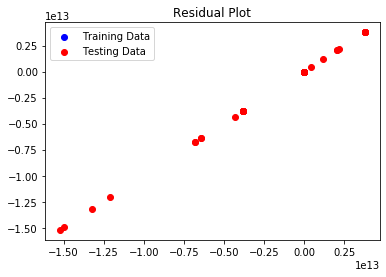

In [83]:

# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [86]:
 from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.802209316136195e+23, R2: -2.653326721763135e+23


# MinMaxScaler

In [43]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# fitting with LinearRegrssion model

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.34842024121748616
Testing Score: -4.605716933921661e+21


# fitting with Neural Network

In [95]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense
number_inputs = 3
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))